In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [6]:
df =pd.read_csv("/content/breast_cancer.csv")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
import pickle 

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
df['diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [13]:
def fillm(diagnosis):
  if(diagnosis=='M'):
    return 1
  else:
    return 0
df['diagnosis']=df['diagnosis'].apply(fillm)


In [14]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [15]:
df.drop(['Unnamed: 32'],axis=1,inplace=True)

In [16]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
x=df[['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean','radius_se','perimeter_se', 'area_se','compactness_se', 'concave points_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','texture_worst','area_worst']].values
y=df[['diagnosis']].values

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [21]:
predict= knn.predict(x_test)

In [25]:
cf=confusion_matrix(predict,y_test)
cf

array([[120,   5],
       [  1,  62]])

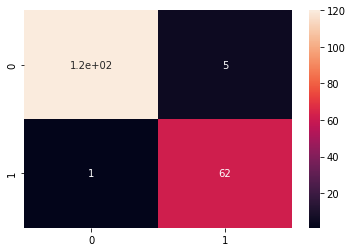

In [24]:
sns.heatmap(cf,annot=True)

In [27]:
pickle.dump(knn,open('breast_cancer.pkl','wb'))